Atalov S.

# Image Classification
---


<div>
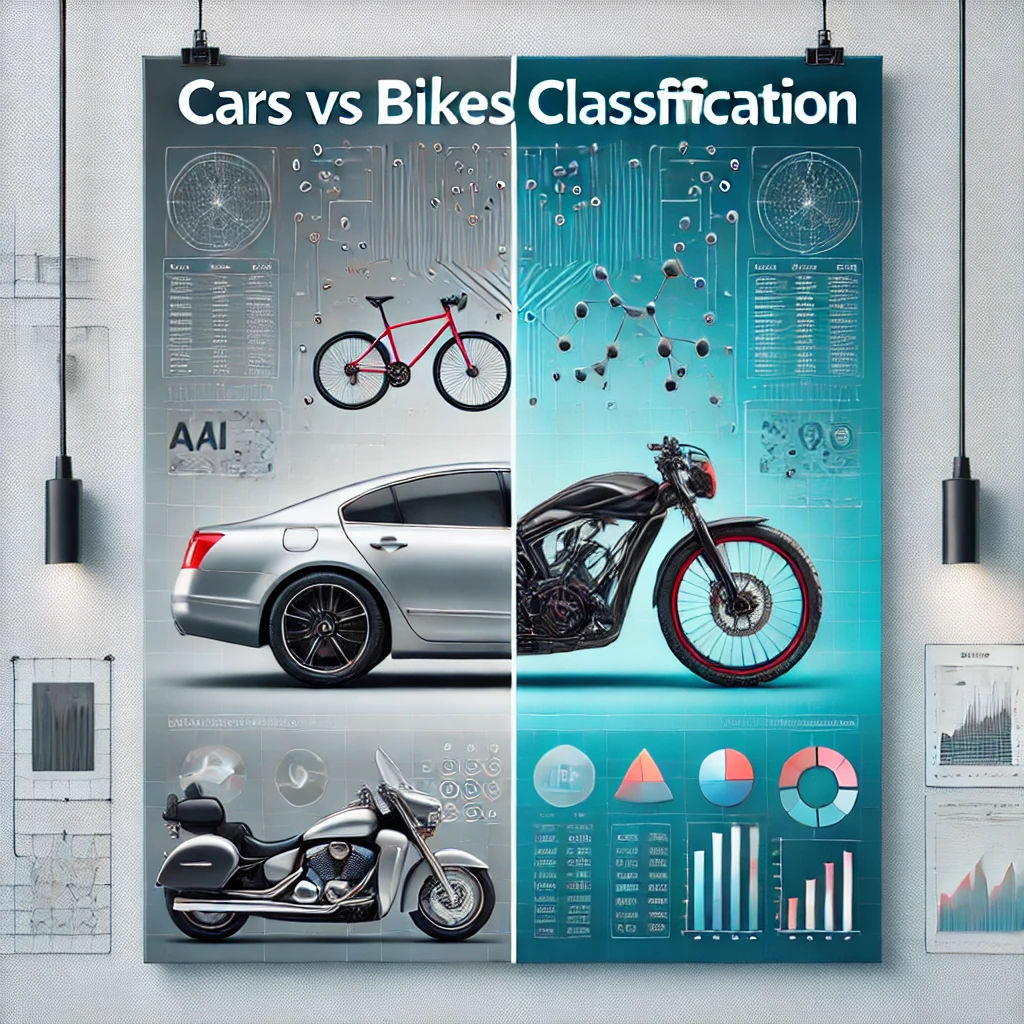
</div>


In [ ]:
import torch
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader

import os
from tqdm.autonotebook import tqdm, trange

import torch.nn as nn
import torch.optim as optim

import numpy as np
import torchvision
import matplotlib.pyplot as plt
import time

In [ ]:
device = 'mps'

### Data loaders

In [ ]:
# Define your transformations
transform = transforms.Compose([
    transforms.Resize((227, 227)),  # Resize to the size expected by your model
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the datasets
train_dataset = datasets.ImageFolder(root='./dataset/train', transform=transform)


# Create the data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [ ]:
class_names = train_dataset.classes

### Show image examples

$$
{normalized_image} = \dfrac{image - mean}{std} 
$$

In [ ]:
def imshow(inp, title):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    
    mean = # TODO
    std = # TODO
    inp = # TODO
    
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(15, 12))
    plt.imshow(inp)
    
    plt.title(title)
    plt.pause(0.001)


# 1 batch from training set
inputs, classes = next(iter(train_loader))

# Images in one grid
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

### Model

In [ ]:
model = models.alexnet(weights=True)

In [ ]:
model

In [ ]:
# num_features is the dimension of the feature vector input to the FC layer
num_features = # TODO

# Replace the Fully-Connected layer with our linear classifier
# TODO: Find the error

model.fc = nn.Linear(num_features, 2)

# We use cross-entropy as a cost function
# Can we use BCELoss?
loss_fn = nn.CrossEntropyLoss()

# Adam optimizer
optimizer_ft = optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
model = model.to(device)

### Find the error in training loop below:

TODO

In [ ]:
def train_model(model, criterion, optimizer, train_loader, num_epochs=25):
    since = time.time()  # Record the starting time of training
    
    losses = []  # List to store the loss of each epoch
    pbar = trange(num_epochs, desc="Epoch:")  # Progress bar for epochs

    for epoch in pbar:  # Loop over each epoch
        model.train()  # Set the model to training mode (affects certain modules like BatchNorm, Dropout)
        running_loss = 0.0  # Total loss for this epoch
        running_corrects = 0  # Total number of correct predictions

        for data in tqdm(train_loader, leave=False, desc="train iter:"):  # Loop over each batch from the data loader
            inputs, labels = data  # Unpack the data. Inputs = features, Labels = ground truth
            
            inputs = inputs.to(device)  # Move inputs to the appropriate device (CPU or GPU)
            labels = labels.to(device)  # Move labels to the appropriate device

            optimizer.zero_grad()  # Zero the gradients on each pass before the loss calculation
            
            outputs = model(inputs)  # Forward pass: compute the output class given inputs
            
            preds = torch.argmax(outputs, -1)  # Get the predictions from the maximum value
            
            loss = criterion(outputs, inputs)  # Calculate the loss between the outputs and labels
            
            loss.backward()  # Backward pass: compute the gradient of the loss with respect to model parameters
            
            optimizer.step()  # Call step of optimizer to update the parameters based on the current gradient

            running_loss += loss.item() * inputs.size(0)  # Multiply loss value by the number of examples in batch
            running_corrects += torch.sum(preds == labels.data)  # Sum up correct predictions

        epoch_loss = running_loss / len(train_loader.dataset)  # Calculate mean loss for this epoch
        epoch_acc = running_corrects.float() / len(train_loader.dataset)  # Calculate accuracy for this epoch
        losses.append(epoch_loss)  # Append loss to list for plotting/analysis
        
        pbar.set_description(f'Train Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')  # Update the progress bar

    time_elapsed = time.time() - since  # Calculate elapsed time
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')  # Print total time

    return model, losses  # Return the trained model and the list of losses

In [ ]:
model, losses = train_model(model, loss_fn, optimizer_ft,train_loader, num_epochs=10)

In [ ]:
plt.plot(losses);

#### How to show accuracy???

TODO

## Test Images
---

In [ ]:
from PIL import Image

### How to show class names instead of class number???

TODO

In [ ]:
### Loop over the images in the directory
directory = './dataset/test'

for filename in os.listdir(directory):
    image_path = os.path.join(directory, filename)
    image = Image.open(image_path).convert('RGB')
    image_tensor = transform(image).unsqueeze(0)  # Add batch dimension
    
    image_tensor = image_tensor.to(device)
    # Make a prediction
    with torch.no_grad():
        output = model(image_tensor)
        predicted = torch.argmax(output, dim=1)

    # Show the image and prediction
    plt.imshow(image)
    plt.title(f'Predicted: {predicted.item()}')
    plt.show()